# Machine Learning - Classification Problem.

Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain. 

An easy to understand example is classifying emails as “spam” or “not spam.”

### Algerian Forest Fires Data Set - Classification Problem.

    Understanding the Data
    The Problem Statement
    Data Collection
    Exploratory data analysis
    Data Cleaning
    Data Pre-Processing
    Model Training
    Choose best model

#### Understanding the Data

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

Data Understanding
    1. The Data set has 12 columns and 247 rows.
    2. The Data had to be processed in order to get into proper data types (.i.e Categorical and Numerical )
    

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

#### The Problem Statement

The dataset contains 12 Features out of which 11 are independent and 1 is a dependent feature called "Classes" which has two values Not Fire and Fire. In this study our goal is to train and develop a model that best fits the data and classisfy the value of "Classes" column as Fire or Not Fire   

#### Data Collection

    Data collected from UCI Machine Learining Repository.
    https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


#### EDA

In [2]:
df = pd.read_csv(r"D:\23_iNeuron_ML\10_01_2022\Algerian_forest_fires_dataset_UPDATE.csv", header = 1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [5]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 14 categorical features : ['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ']


In [6]:
# Reading Columns Names in the Data

In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [8]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [9]:
# Dropping out rows with missing values

In [10]:
df = df.dropna(axis = 0, how = 'all', thresh=4)

In [11]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [12]:
df_1 = df.loc[0:122]

In [13]:
df_1['Region'] = 1

C:\Users\user\AppData\Local\Temp/ipykernel_3132/2673887463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Region'] = 1


In [14]:
df_2 = df.drop([124],inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_3132/626630076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2 = df.drop([124],inplace=True)


In [15]:
df_2 = df.loc[124:]

In [16]:
df_2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
129,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [17]:
df_2['Region'] = 0

C:\Users\user\AppData\Local\Temp/ipykernel_3132/3082136290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Region'] = 0


In [18]:
df_f = pd.concat([df_1,df_2],axis=0)

In [19]:
df_f.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [20]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [21]:
df_fc=df_f[['Classes  ']]

In [22]:
df_fc.head()

,Classes
0,not fire
1,not fire
2,not fire
3,not fire
4,not fire


In [42]:
df_fc['Classes  '] = df_fc['Classes  '].str.replace(" ", "")

C:\Users\user\AppData\Local\Temp/ipykernel_3132/633975976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fc['Classes  '] = df_fc['Classes  '].str.replace(" ", "")


In [43]:
df_fd = df_f.drop(['Classes  '],axis=1)

In [44]:
df_fd.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region'],
      dtype='object')

In [45]:
df_fd.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1


In [46]:
df_fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Region       244 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 36.7+ KB


In [47]:
# df_fd.to_csv("wd1.csv")

In [48]:
# df_fd['Rain '] = df_fd['Rain '].astype('float')
# df_fd['Rain '] = df_fd['Rain '].astype('float')

In [49]:
for col in df_fd.columns:
    df_fd[col] = df_fd[col].astype('float')

In [50]:
df_fd.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0


In [51]:
df_f1 = df_fd.join(df_fc)

In [52]:
df_f1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,notfire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,notfire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,notfire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0,notfire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0,notfire


In [53]:
df_f1.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
242,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0.0,fire
243,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,notfire
244,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,notfire
245,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,notfire
246,30.0,9.0,2012.0,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0.0,notfire


In [54]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Region       244 non-null    float64
 14  Classes      243 non-null    object 
dtypes: float64(14), object(1)
memory usage: 38.6+ KB


In [55]:
df_f1.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,notfire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,notfire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,notfire


In [56]:
categorical_features = [feature for feature in df_f1.columns if df_f1[feature].dtype == "O"]

In [57]:
# proportion of count data on categorical column
for col in categorical_features:
    print(df_f1[col].value_counts(normalize=True) * 100)
    print('---------------------------')

fire       56.378601
notfire    43.621399
Name: Classes  , dtype: float64
---------------------------


Observation

    We see that the data is balanced as fire and not fire data points are in the ration of approx. 6:4

In [59]:
numerical_features = [feature for feature in df_f1.columns if df_f1[feature].dtype != "O"]

# Visualizing the patterns of missing value

In [60]:
df_f1.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
Classes        1
dtype: int64

In [61]:
df_f1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes  '],
      dtype='object')

<AxesSubplot:>

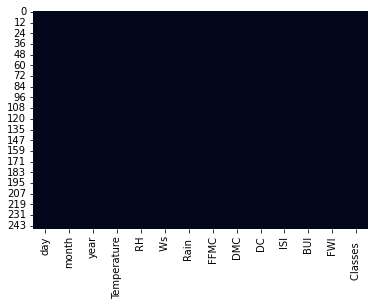

In [62]:
sns.heatmap(df.isnull(), cbar=False)

In [63]:
df_f1[df_f1['Classes  '].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
168,14.0,7.0,2012.0,37.0,37.0,18.0,0.2,88.9,12.9,14.69,12.5,10.4,8.3,0.0,NaN


In [64]:
df_f1['Classes  '].mode()

0    fire
Name: Classes  , dtype: object

In [65]:
df_f1['Classes  '].fillna(value = 'fire', inplace = True)

Comment: 
    Missing value has been filled with 'mode' 
    
    

In [66]:
df_f1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,notfire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,notfire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,notfire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0,notfire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0,notfire


In [67]:
df_f1.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
Classes        0
dtype: int64

## Univariate Analysis - Numerical Variables

<AxesSubplot:ylabel='Frequency'>

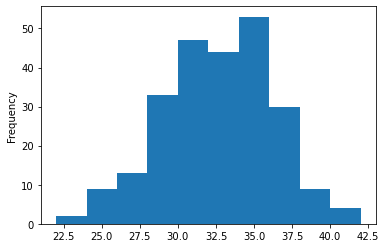

In [68]:
df_f1['Temperature'].plot.hist()

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

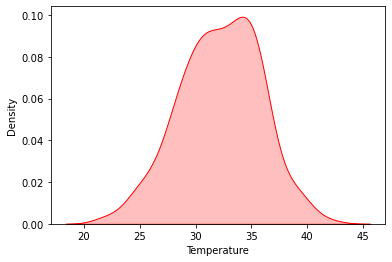

In [69]:
# Plotting the KDE Plot
sns.kdeplot(df_f1['Temperature'], color='r', shade=True)

<AxesSubplot:>

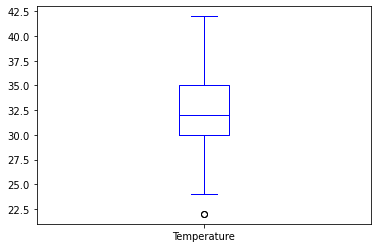

In [70]:
df_f1.boxplot(column=['Temperature'], grid=False, color='blue')

In [71]:
print("Minimum temperature:")
df_f1['Temperature'].min()

Minimum temperature:


22.0

In [72]:
print("Maximum temperature:")
df_f1['Temperature'].max()

Maximum temperature:


42.0

In [73]:
print("Mean temperature:")
df_f1['Temperature'].mean()

Mean temperature:


32.17213114754098

In [74]:
print("Mode temperature:")
df_f1['Temperature'].mode()

Mode temperature:


0    35.0
Name: Temperature, dtype: float64

<AxesSubplot:ylabel='Frequency'>

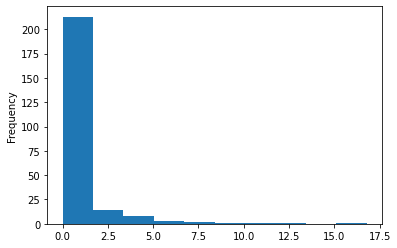

In [75]:
# Plotting the Histogram
df_f1['Rain '].plot.hist()

<AxesSubplot:xlabel='Rain ', ylabel='Density'>

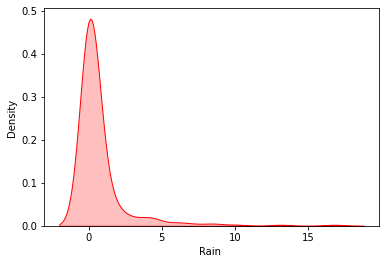

In [76]:
# Plotting the KDE Plot
sns.kdeplot(df_f1['Rain '], color='r', shade=True)

<AxesSubplot:>

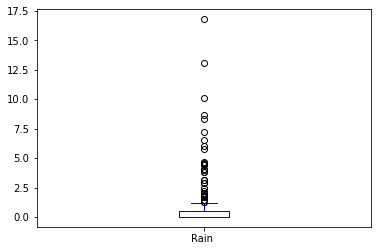

In [77]:
df_f1.boxplot(column=['Rain '], grid=False, color='blue')

In [78]:
print("Minimum rainfall:")
df_f1['Rain '].min()

Minimum rainfall:


0.0

In [79]:
print("Maximun rainfall:")
df_f1['Rain '].max()

Maximun rainfall:


16.8

In [80]:
print("Mean rainfall:")
df_f1['Rain '].mean()

Mean rainfall:


0.7606557377049175

## Univariate Analysis - Categorical Variables

The purpose of univariate analysis is to understand the distribution of values for a single variable.

<AxesSubplot:>

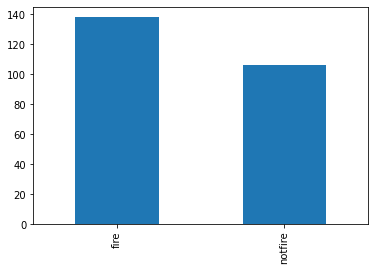

In [81]:
df_f1['Classes  '].value_counts().plot.bar()

In [82]:
df_f1['Classes  '].nunique()

2

Observation: We have 2 classes Fire and notfire

In [83]:
df_f1['Region'].value_counts()

1.0    122
0.0    122
Name: Region, dtype: int64

<AxesSubplot:>

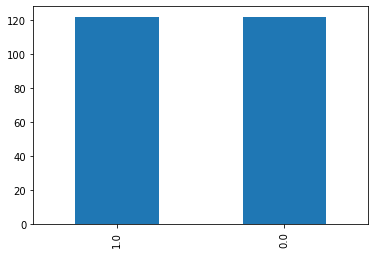

In [84]:
df_f1['Region'].value_counts().plot.bar()

Observation:
    Added a new column called Region where the regions are represented by 0 and 1
    Bejaia Region Dataset : 1 = count : 120
    Sidi-Bel Abbes Region Dataset : 0  = count : 120

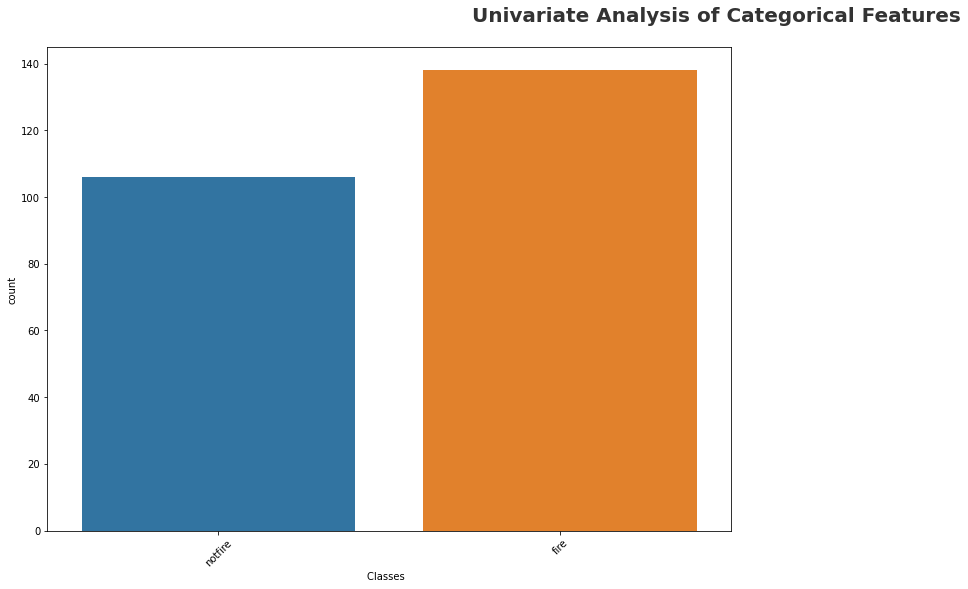

In [85]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Classes  ']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_f1[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [86]:
numerical_features

['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region']

In [87]:
len(numerical_features)

14

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


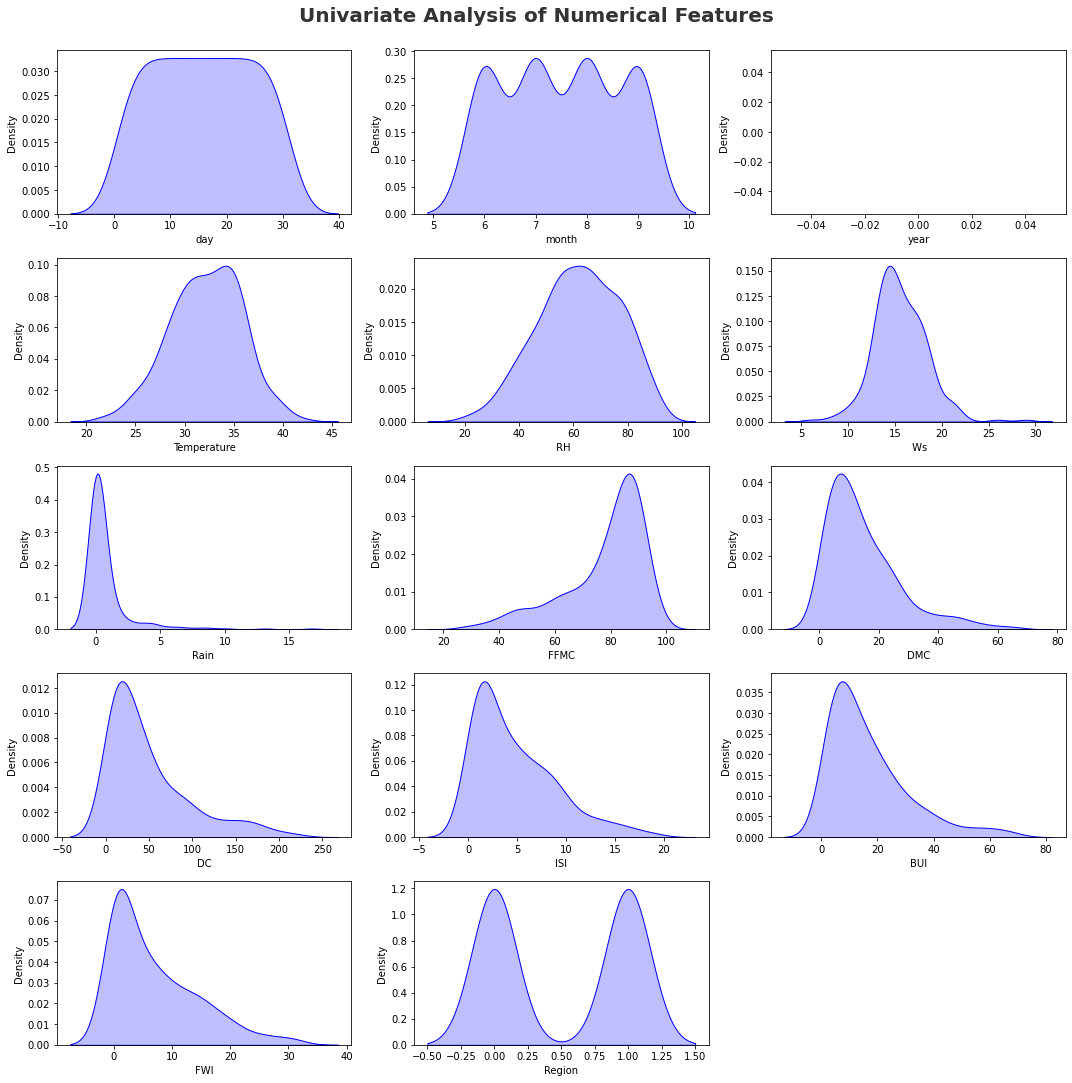

In [88]:
# Numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_f1[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

## Multi-Variate Analysis

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rain ', ylabel='Temperature'>

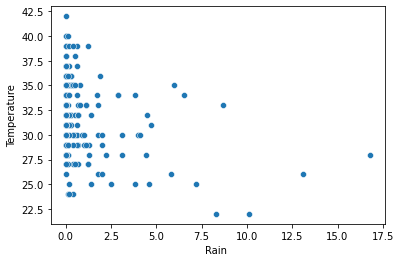

In [89]:
sns.scatterplot(df_f1['Rain '], df_f1['Temperature'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rain ', ylabel='Classes  '>

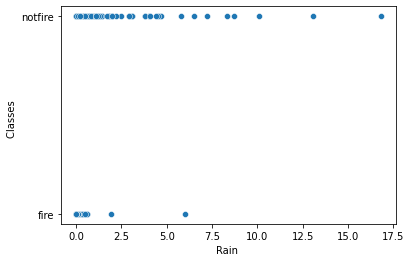

In [90]:
sns.scatterplot(df_f1['Rain '], df_f1['Classes  '])

<AxesSubplot:>

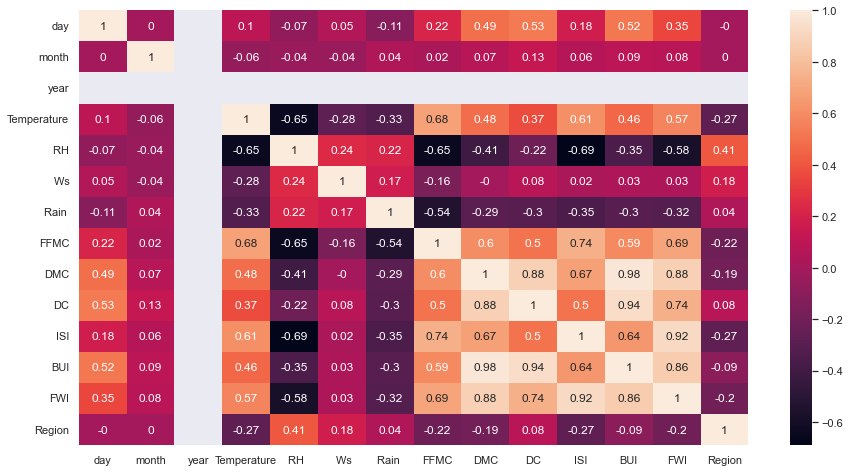

In [91]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(np.round(df_f1.corr(),2), annot=True)

Comment: From above we see that when rainfall increases chances of forest fire decreases.


Text(0.5, 1.0, 'Fire by Temperature')

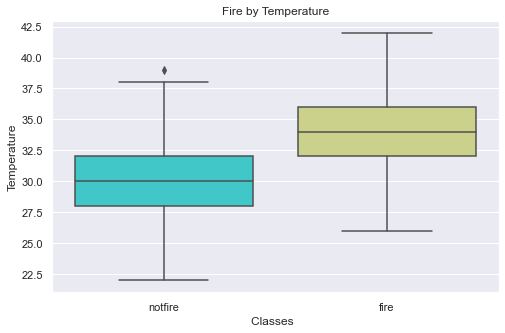

In [92]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Classes  ',y='Temperature',data=df_f1, palette='rainbow')
plt.title("Fire by Temperature")

Text(0.5, 1.0, 'Fire by Temperature')

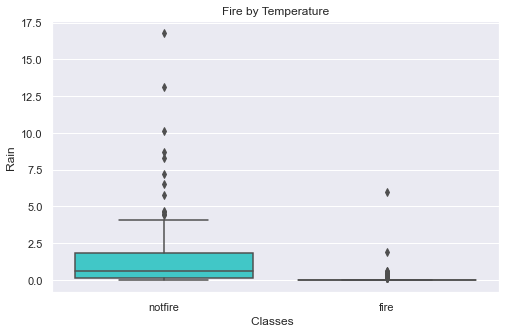

In [93]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Classes  ',y='Rain ',data=df_f1, palette='rainbow')
plt.title("Fire by Temperature")

Text(0.5, 1.0, 'Fire v/s Rain')

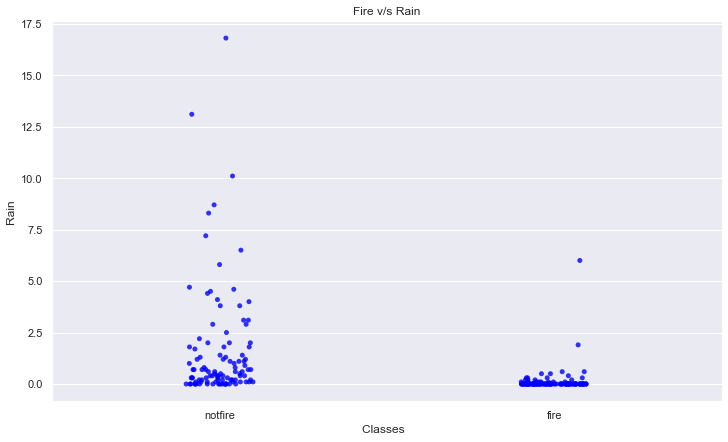

In [94]:
plt.figure(figsize=(12,7))
sns.stripplot(x='Classes  ',y='Rain ',data=df_f1, dodge='True', color='blue', alpha=.8, s=5)
plt.title("Fire v/s Rain")

Text(0.5, 1.0, 'Fire v/s Temperature')

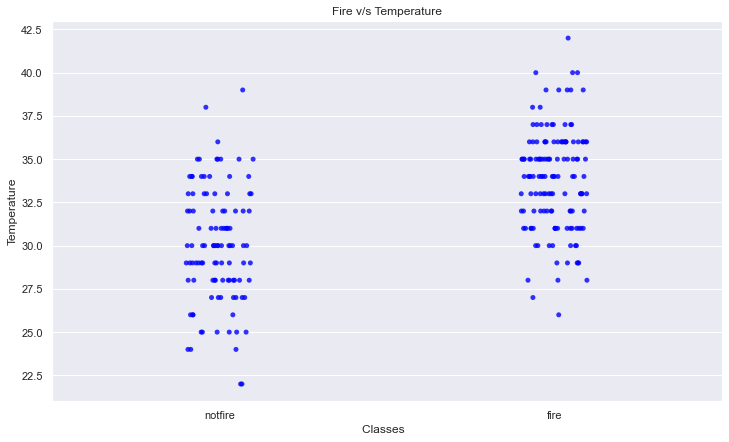

In [95]:
plt.figure(figsize=(12,7))
sns.stripplot(x='Classes  ',y='Temperature',data=df_f1, dodge='True', color='blue', alpha=.8, s=5)
plt.title("Fire v/s Temperature")

In [96]:
df_f1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes  '],
      dtype='object')

Text(0.5, 1.0, 'Fire v/s Temperature')

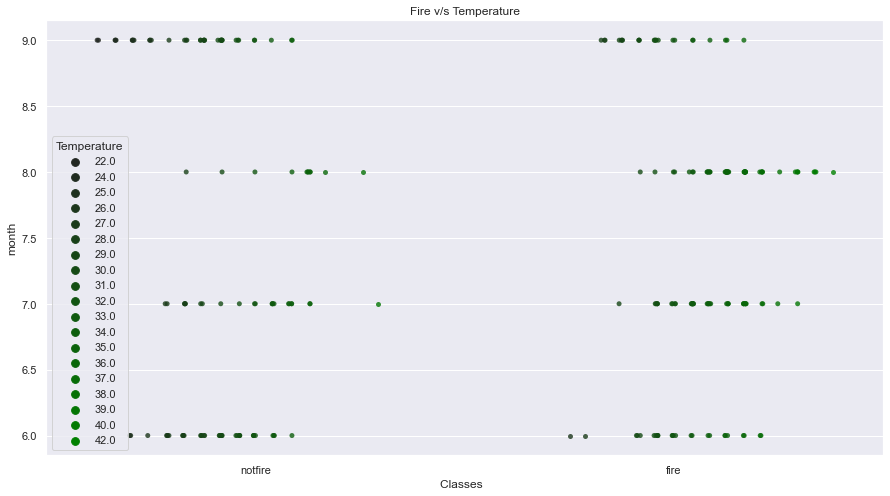

In [97]:
sns.stripplot(x='Classes  ',y='month',data=df_f1, hue='Temperature', dodge='True', color='green', alpha=.8, s=5)
plt.title("Fire v/s Temperature")

Text(0.5, 1.0, '')

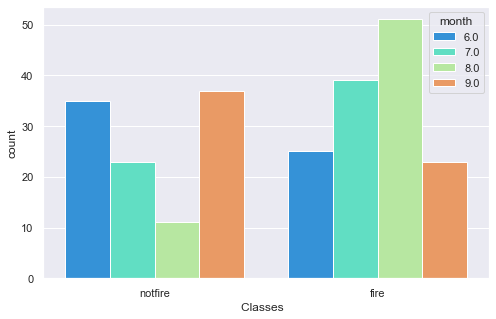

In [98]:
plt.figure(figsize=(8,5))
sns.countplot(x='Classes  ',data=df_f1, palette='rainbow',hue='month')
plt.title("")

In [99]:
df_f1['month'].value_counts()

7.0    62
8.0    62
6.0    60
9.0    60
Name: month, dtype: int64

Text(0.5, 1.0, 'Temperature v/s Fire Count')

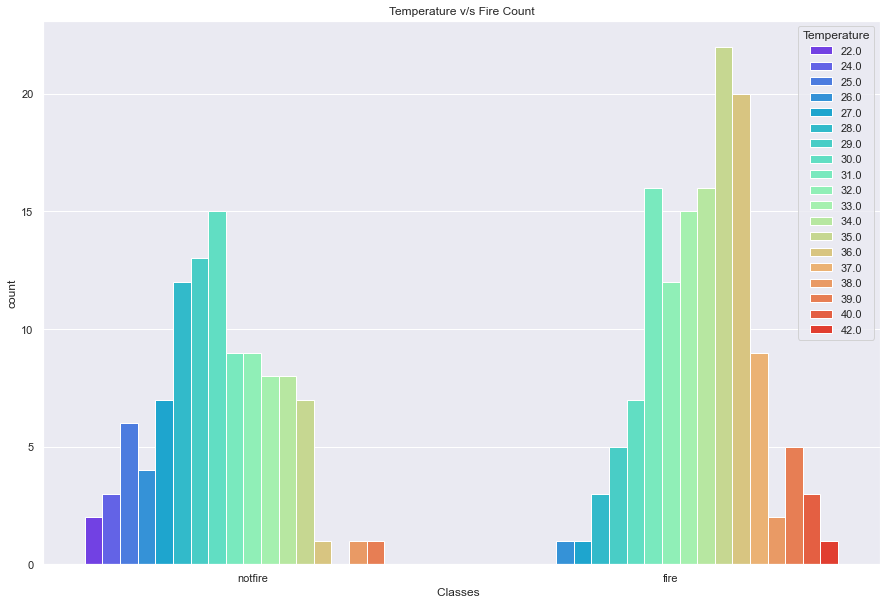

In [100]:
plt.figure(figsize=(15,10))
sns.countplot(x='Classes  ',data=df_f1, palette='rainbow',hue='Temperature')
plt.title("Temperature v/s Fire Count")

In [101]:
# Preparing Data for LR-Model 

In [112]:
df_f1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0,notfire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0,notfire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0,notfire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0,notfire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0,notfire


In [113]:
df_f1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes  '],
      dtype='object')

In [103]:
## Independent And Dependent Features

In [114]:
X=df_f1.drop(columns=['Classes  ','year'])

In [115]:
y=df_f1.iloc[:,-1]

In [116]:
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0
1,2.0,6.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0
2,3.0,6.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0
3,4.0,6.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0
4,5.0,6.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0


In [117]:
y.head()

0    notfire
1    notfire
2    notfire
3    notfire
4    notfire
Name: Classes  , dtype: object

In [118]:
# Train test split

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=10)

In [120]:
X_train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
240,24.0,9.0,26.0,49.0,6.0,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0.0
78,18.0,8.0,36.0,54.0,18.0,0.0,89.4,20.0,110.9,9.7,27.5,16.1,1.0
25,26.0,6.0,31.0,64.0,18.0,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1.0
127,3.0,6.0,29.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0.0
179,25.0,7.0,39.0,64.0,9.0,1.2,73.8,11.7,15.9,1.1,11.4,0.7,0.0


In [121]:
X_train.shape

(163, 13)

In [122]:
y_train.head()

240    notfire
78        fire
25        fire
127    notfire
179    notfire
Name: Classes  , dtype: object

In [123]:
y_train.shape

(163,)

In [120]:
# Feature Engineering

In [124]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [125]:
X_train=scaler.fit_transform(X_train)

In [126]:
X_test=scaler.transform(X_test)

## Model Training

In [171]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [172]:
regression.fit(X_train,y_train)

LogisticRegression()

In [173]:
## Prediction for the test data
y_pred=regression.predict(X_test)
y_pred

array(['notfire', 'fire', 'fire', 'notfire', 'fire', 'fire', 'notfire',
       'notfire', 'fire', 'fire', 'fire', 'fire', 'fire', 'notfire',
       'notfire', 'notfire', 'fire', 'notfire', 'notfire', 'notfire',
       'fire', 'notfire', 'notfire', 'notfire', 'fire', 'fire', 'fire',
       'notfire', 'notfire', 'fire', 'fire', 'notfire', 'fire', 'fire',
       'notfire', 'notfire', 'notfire', 'notfire', 'notfire', 'notfire',
       'notfire', 'notfire', 'notfire', 'notfire', 'notfire', 'fire',
       'fire', 'notfire', 'notfire', 'fire', 'fire', 'fire', 'fire',
       'notfire', 'fire', 'notfire', 'notfire', 'notfire', 'fire',
       'notfire', 'fire', 'fire', 'fire', 'fire', 'notfire', 'fire',
       'fire', 'fire', 'notfire', 'fire', 'notfire', 'fire', 'fire',
       'notfire', 'fire', 'fire', 'notfire', 'notfire', 'fire', 'notfire',
       'notfire', 'fire', 'notfire', 'notfire', 'fire', 'fire', 'fire',
       'notfire', 'fire', 'fire', 'notfire', 'notfire'], dtype=object)

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [175]:
accuracy = accuracy_score(y_test,y_pred)
accuracy * 100

94.56521739130434

In [176]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[43,  3],
       [ 2, 44]], dtype=int64)

#### Under Sampeling Method

In [177]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler 

In [178]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({'fire': 138, 'notfire': 106})


In [179]:
rus = RandomUnderSampler(random_state=42)

In [180]:
X_res, y_res = rus.fit_resample(X, y)

In [181]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'fire': 106, 'notfire': 106})


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=10)

In [183]:
# Feature Engineering
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [184]:
# Fitting the Model
regression.fit(X_train,y_train)

LogisticRegression()

In [185]:
## Prediction for the test data
y_pred=regression.predict(X_test)
y_pred

array(['fire', 'notfire', 'fire', 'notfire', 'notfire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'notfire', 'fire', 'fire',
       'notfire', 'notfire', 'notfire', 'fire', 'fire', 'notfire', 'fire',
       'fire', 'fire', 'notfire', 'fire', 'fire', 'fire', 'notfire',
       'fire', 'notfire', 'fire', 'notfire', 'notfire', 'fire', 'notfire',
       'fire', 'fire', 'fire', 'notfire', 'notfire', 'fire', 'fire',
       'fire', 'notfire', 'notfire', 'fire', 'notfire', 'notfire',
       'notfire', 'fire', 'notfire', 'fire', 'fire', 'fire', 'notfire',
       'notfire', 'notfire', 'notfire', 'notfire', 'notfire', 'notfire',
       'fire', 'notfire', 'notfire', 'notfire', 'fire', 'notfire',
       'notfire', 'fire', 'notfire'], dtype=object)

In [186]:
accuracy_us = accuracy_score(y_test,y_pred)
accuracy_us * 100

98.57142857142858

In [187]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[35,  1],
       [ 0, 34]], dtype=int64)

#### Over Sampling

In [188]:
from imblearn.over_sampling import SMOTE

In [189]:
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({'fire': 138, 'notfire': 106})


In [190]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [191]:
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({'notfire': 138, 'fire': 138})


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=10)

In [193]:
# Feature Engineering
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [194]:
# Fitting the Model
regression.fit(X_train,y_train)

LogisticRegression()

In [195]:
## Prediction for the test data
y_pred=regression.predict(X_test)
y_pred

array(['notfire', 'fire', 'fire', 'notfire', 'fire', 'fire', 'notfire',
       'notfire', 'fire', 'fire', 'fire', 'notfire', 'fire', 'notfire',
       'notfire', 'notfire', 'fire', 'notfire', 'notfire', 'notfire',
       'fire', 'notfire', 'notfire', 'notfire', 'fire', 'fire', 'fire',
       'notfire', 'notfire', 'fire', 'fire', 'notfire', 'fire', 'fire',
       'notfire', 'notfire', 'notfire', 'notfire', 'notfire', 'notfire',
       'notfire', 'notfire', 'notfire', 'notfire', 'notfire', 'fire',
       'fire', 'notfire', 'notfire', 'fire', 'fire', 'fire', 'fire',
       'notfire', 'fire', 'notfire', 'notfire', 'notfire', 'fire',
       'notfire', 'fire', 'fire', 'fire', 'fire', 'notfire', 'fire',
       'fire', 'fire', 'notfire', 'fire', 'notfire', 'fire', 'fire',
       'notfire', 'fire', 'fire', 'notfire', 'notfire', 'fire', 'notfire',
       'notfire', 'fire', 'notfire', 'notfire', 'fire', 'fire', 'fire',
       'notfire', 'fire', 'fire', 'notfire', 'notfire'], dtype=object)

In [196]:
accuracy_os = accuracy_score(y_test,y_pred)
accuracy_os * 100

95.65217391304348

In [197]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[43,  3],
       [ 1, 45]], dtype=int64)

### Accuracy before and after Balancing Data

In [201]:
print("Imbalance Data",accuracy*100)
print("Balance Data UnderSampling",accuracy_us*100)
print("Balance Data OverSampling",accuracy_os*100)

Imbalance Data 94.56521739130434
Balance Data UnderSampling 98.57142857142858
Balance Data OverSampling 95.65217391304348
